# Import the data from xlsx 

In [12]:
import openpyxl
import datetime
# Open the workbook and select the first worksheet
wb = openpyxl.load_workbook('wordle_data.xlsx')
sh = wb['Sheet1']
# List to hold dates
date_list = []
word_list = []
normal_people_list = []
hard_people_list = []
overall_percent_list = []

#Iterate through each row in worksheet and fetch values into dict
#value starts at row 3

for row in range(3, sh.max_row + 1):
    # Each row in the spreadsheet has data for one date
	date = sh.cell(row=row, column=1).value
	# if the date is none, then break the loop
	if date is None:
		break
	word = sh.cell(row=row, column=3).value
	normal_people = sh.cell(row=row, column=4).value
	hard_people = sh.cell(row=row, column=5).value
	# F to L as a list, then append the list to overall_percent_list
	daily_percent = [sh.cell(row=row, column=i).value for i in range(6, 12)]
	

	# Append the date and value to the appropriate list
	# Convert the date string into a datetime object.
	date = datetime.datetime.strptime(date, "%m/%d/%Y")
	date_list.append(date)
	word_list.append(word)
	normal_people_list.append(normal_people)
	hard_people_list.append(hard_people)
	overall_percent_list.append(daily_percent)
 
# inverse all lists into chronological order
date_list.reverse()
word_list.reverse()
normal_people_list.reverse()
hard_people_list.reverse()
overall_percent_list.reverse()




# Data Preprocessing

In [13]:
import numpy as np
import matplotlib
normal_people_array = np.array(normal_people_list).astype(float)
hard_people_array = np.array(hard_people_list).astype(float)
hard_ratio = hard_people_array / normal_people_array 




0.0035651065677014347
9627.371418001952
583.3305749709489


/tmp/ipykernel_57578/1280775634.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


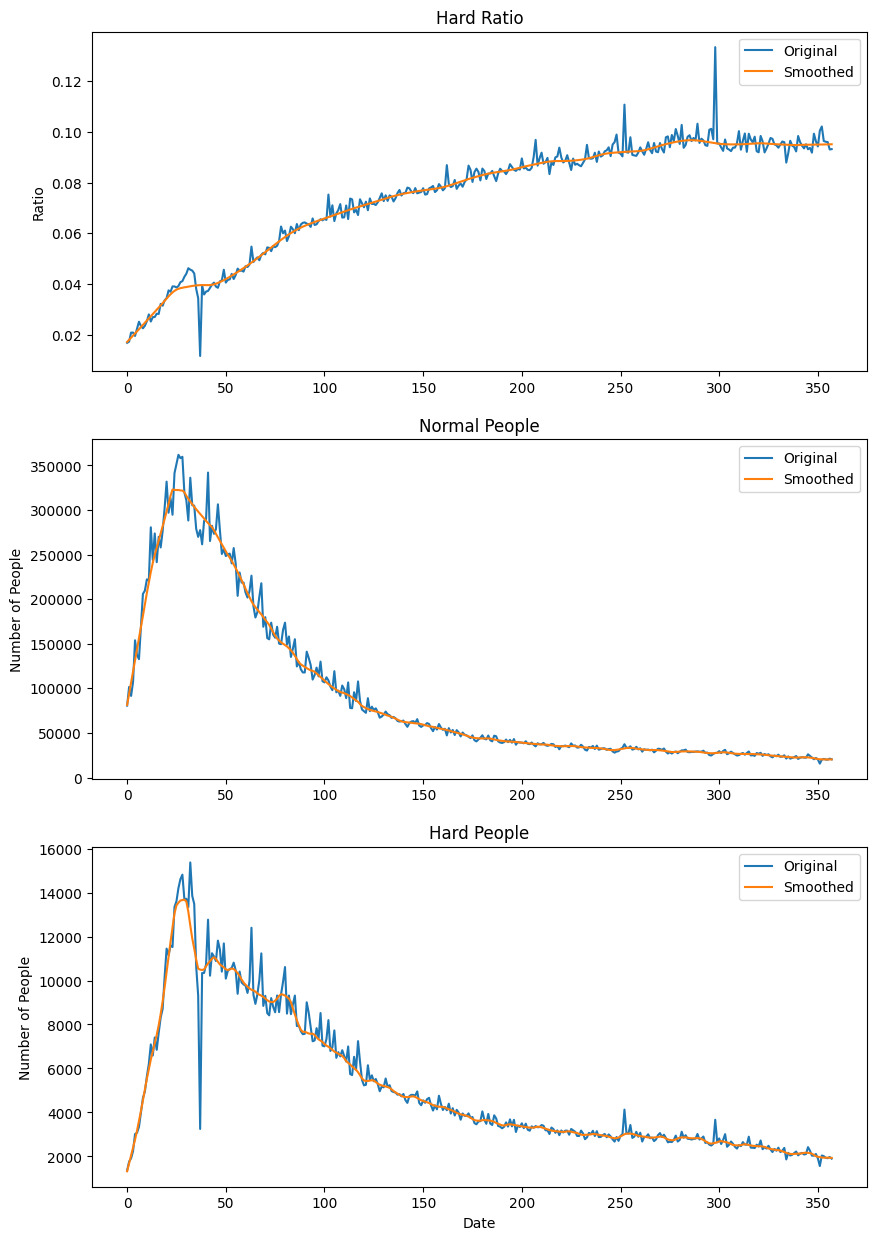

In [41]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
#define a LOWESS function
def lowess(data, smoothing_param = 0.1):
	smoothing_param = smoothing_param
	lowess_model = sm.nonparametric.lowess(data, range(len(data)), frac=smoothing_param)
	smoothed_data = lowess_model[:, 1]
	return smoothed_data


# evaluate the fitness of the model
smoothed_hard_ratio = lowess(hard_ratio, smoothing_param = 0.1)
smoothed_normal_people_list = lowess(normal_people_array, smoothing_param = 0.04)
smoothed_hard_people_list = lowess(hard_people_array, smoothing_param = 0.03)

# evaluate the fitness of the model
rmse = sqrt(mean_squared_error(hard_ratio, smoothed_hard_ratio))
rmse_2 = sqrt(mean_squared_error(normal_people_array, smoothed_normal_people_list))
rmse_3 = sqrt(mean_squared_error(hard_people_array, smoothed_hard_people_list))
print(rmse)
print(rmse_2)
print(rmse_3)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
ax1.plot(hard_ratio, label='Original')
ax1.plot(smoothed_hard_ratio, label='Smoothed')
ax1.title.set_text('Hard Ratio')
ax1.set_ylabel('Ratio')
ax1.legend()


ax2.plot(normal_people_array, label='Original')
ax2.plot(smoothed_normal_people_list, label='Smoothed')
ax2.title.set_text('Normal People')
ax2.set_ylabel('Number of People')
ax2.legend()


ax3.plot(hard_people_array, label='Original')
ax3.plot(smoothed_hard_people_list, label='Smoothed')
ax3.title.set_text('Hard People')
ax3.set_xlabel('Date')
ax3.set_ylabel('Number of People')
ax3.legend()

fig.show()

In [40]:
# save the smoothed data and its date into a csv file
import csv
with open('smoothed_data.csv', 'w') as csvfile:
	fieldnames = ['date', 'word', 'normal_people', 'hard_people', 'overall_percent']
	writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
	writer.writeheader()
	for i in range(len(date_list)):
		writer.writerow({'date': date_list[i], 'word': word_list[i], 'normal_people': smoothed_normal_people_list[i], 'hard_people': smoothed_hard_people_list[i], 'overall_percent': overall_percent_list[i]})


# Prediction

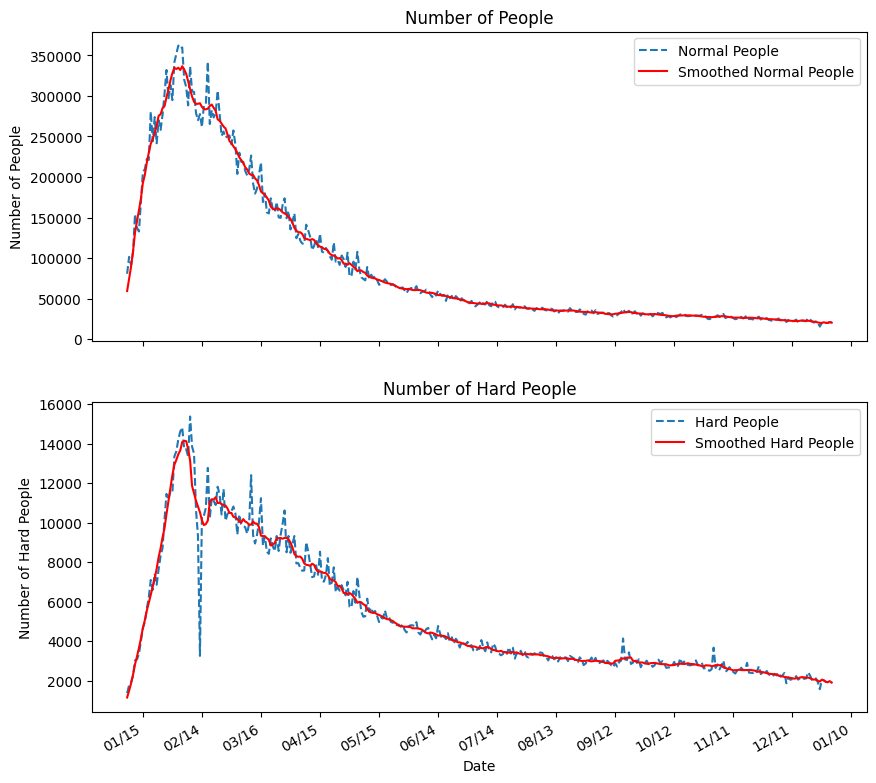

In [24]:

# Plot the data for comparison in two graphs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# # Plot the data of normal people and hard people
ax1.plot(date_list, normal_people_array, '--', label='Normal People')
ax1.plot(date_list, smoothed_normal_people_list, 'r', label='Smoothed Normal People')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax1.xaxis.set_tick_params(rotation=120)
ax1.set_title('Number of People')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of People')
ax1.legend()

# # Plot the smoothed data of normal people and hard people
ax2.plot(date_list, hard_people_array,'--', label='Hard People')
ax2.plot(date_list, smoothed_hard_people_list,'r', label='Smoothed Hard People')
ax2.set_title('Number of Hard People')
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax2.xaxis.set_tick_params(rotation=120)
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Hard People')
ax2.legend()


# # Format the x-axis for dates (label formatting, rotation)
fig.autofmt_xdate()

# # Show the plot
plt.show()

# Todo
Curve Fit

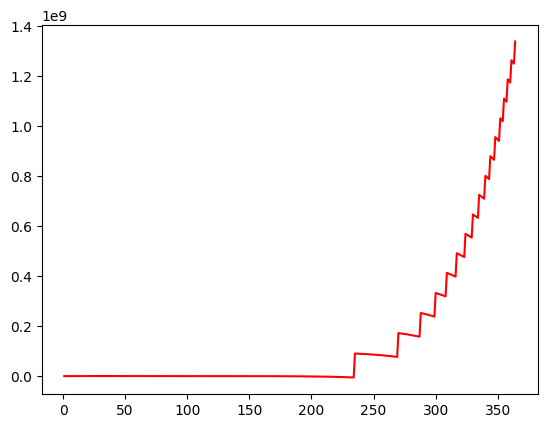

In [30]:
p1 =   2.621e-15 
p2 =  -5.204e-12  
p3 =   4.446e-09  
p4 =  -2.134e-06  
p5 =   0.0006304  
p6 =     -0.1177
p7 =       13.67  
p8 =        -916
p9 =   2.796e+04  
p10 =   1.151e+04  

# Calcuate the number of people from day 1 to day 730
t_sample = np.arange(1, 365, 1)
y_sample = p1 * t_sample**9 + p2 * t_sample**8 + p3 * t_sample**7 + p4 * t_sample**6 + p5 * t_sample**5 + p6 * t_sample**4 + p7 * t_sample**3 + p8 * t_sample**2 + p9 * t_sample + p10

#plot the curve t_sample as x_axis, y_sample as y_axis

import matplotlib.pyplot as plt

plt.plot(t_sample, y_sample, 'r', label='Curve Fit')
	

(730,)

# Random forest model
Predict number of participants

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [17]:
import datetime

# Set the reference date
ref_date = datetime.date(2022, 1, 1)

# Convert the dates to datetime objects
date_list = [datetime.datetime.strptime(date_str, '%Y-%m-%d').date() for date_str in date_list_str]

# Calculate the number of days since the reference date
date_list_float = [(date - ref_date).days for date in date_list]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate model performance
print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) #  Calculate mean squared error
print('R-squared:', r2_score(y_test, y_pred))



NameError: name 'date_list_str' is not defined

ValueError: x and y must be the same size

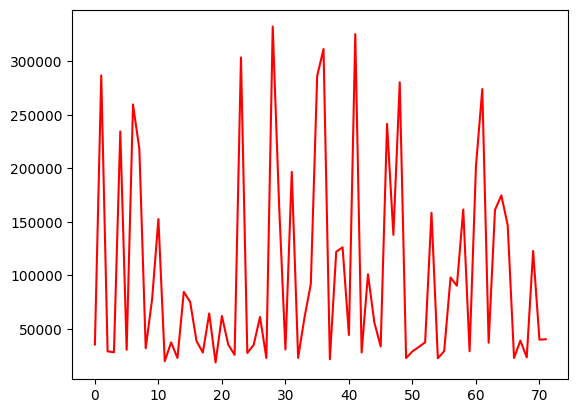

In [ ]:
# Plot the predicted values as a red line
plt.plot(y_pred, color='red', label='Predicted')

# Plot the actual values as blue scatter points
plt.scatter(X_test, y_test, color='blue', label='Actual')

plt.xlabel('Instance')
plt.ylabel('Participants')
plt.title('Actual vs. Predicted(Test Data)')
plt.legend()
plt.show()

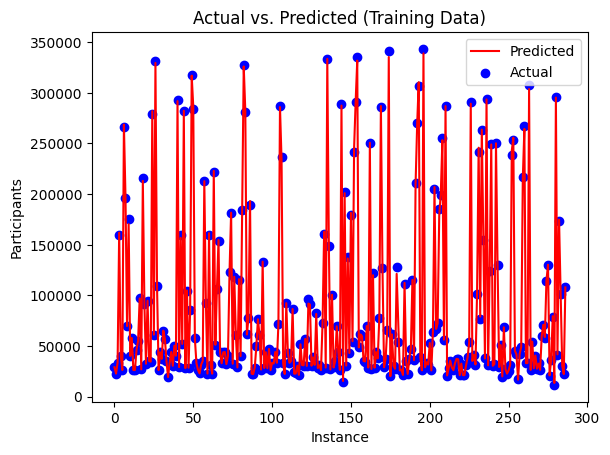

In [ ]:
# Make predictions on the training data
y_pred_train = rf.predict(X_train)

# Plot the predicted values as a red line
plt.plot(y_pred_train, color='red', label='Predicted')

# Plot the actual values as blue scatter points
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual')

plt.xlabel('Instance')
plt.ylabel('Participants')
plt.title('Actual vs. Predicted (Training Data)')
plt.legend()
plt.show()


# Predict March 1st 2023

ValueError: X has 3 features, but RandomForestRegressor is expecting 2 features as input.